# **Predict Employee Turnover With Python**

# Introduction
This python notebook presents a reference implementation of an employee turnover analysis project that is built by using Python’s Scikit-Learn library. In it, we introduce Logistic Regression, Random Forest, and Support Vector Machine. We also measure the accuracy of models that are built by using Machine Learning, and assess directions for further development. And we will do all of the above in Python. Let’s get started!

# Data Preprocessing

The data was downloaded from Kaggle. It is pretty straightforward. Each row represents an employee, each column contains employee attributes:

*   satisfaction_level (0–1)
*   last_evaluation (Time since last evaluation in years)
*   number_projects (Number of projects completed while at work)
*   average_monthly_hours (Average monthly hours at workplace)
*   time_spend_company (Time spent at the company in years)
*   Work_accident (Whether the employee had a workplace accident)
*   left (Whether the employee left the workplace or not (1 or 0))
*   promotion_last_5years (Whether the employee was promoted in the last five years)
*   sales (Department in which they work for)
*   salary (Relative level of salary)

In [1]:
import pandas as pd
hr = pd.read_csv('HR_comma_sep.csv')
col_names = hr.columns.tolist()
print("Column names:")
print(col_names)
print("\nSample data:")
hr.head()

Column names:
['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'sales', 'salary']

Sample data:


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [2]:
#Rename column name from “sales” to “department”

hr=hr.rename(columns = {'sales':'department'})

In [3]:
#The type of the columns can be found out as follows:

hr.dtypes

,0
satisfaction_level,float64
last_evaluation,float64
number_project,int64
average_montly_hours,int64
time_spend_company,int64
Work_accident,int64
left,int64
promotion_last_5years,int64
department,object
salary,object


In [4]:
#Our data is pretty clean, no missing values

hr.isnull().any()

,0
satisfaction_level,False
last_evaluation,False
number_project,False
average_montly_hours,False
time_spend_company,False
Work_accident,False
left,False
promotion_last_5years,False
department,False
salary,False


In [5]:
#The data contains 14,999 employees and 10 features

hr.shape

(14999, 10)

The “left” column is the outcome variable recording 1 and 0. 1 for employees who left the company and 0 for those who didn't.

In [6]:
#The department column of the dataset has many categories and we need to reduce the categories for a better modeling. The department column has the following categories:

hr['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [7]:
#Let us combine “technical”, “support” and “IT” together and call them “technical”.

import numpy as np
hr['department']=np.where(hr['department'] =='support', 'technical', hr['department'])
hr['department']=np.where(hr['department'] =='IT', 'technical', hr['department'])

After the change, this is how the department categories look:

[‘sales’ ‘accounting’ ‘hr’ ‘technical’ ‘management’ ‘product_mng’
‘marketing’ ‘RandD’]

# ***Data Exploration***

In [8]:
#First of all, let us find out the number of employees who left the company and those who didn’t:

hr['left'].value_counts()

#There are 3571 employees left and 11428 employees stayed in our data.

,count
left,
0,11428
1,3571


In [11]:
# Let us get a sense of the numbers across these two classes:
left_Summary = hr.groupby('left')
# Select only numerical features for calculating the mean
numerical_features = hr.select_dtypes(include=np.number).columns
left_Summary[numerical_features].mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
left,,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.0,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,1.0,0.005321


# Several observations:

*   The average satisfaction level of employees who stayed with the company is
higher than that of the employees who left.
*   The average monthly work hours of employees who left the company is more than that of the employees who stayed.
*   The employees who had workplace accidents are less likely to leave than that of the employee who did not have workplace accidents.
*   The employees who were promoted in the last five years are less likely to leave than those who did not get a promotion in the last five years.

In [13]:
#We can calculate categorical means for categorical variables such as department and salary to get a more detailed sense of our data like so:

department_Summary = hr.groupby('department')
# Select only numerical features for calculating the mean
numerical_features = hr.select_dtypes(include=np.number).columns
department_Summary[numerical_features].mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
department,,,,,,,,
RandD,0.619822,0.712122,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307
accounting,0.582151,0.717718,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253
hr,0.598809,0.708850,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298
management,0.621349,0.724000,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524
marketing,0.618601,0.715886,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117
product_mng,0.619634,0.714756,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000
sales,0.614447,0.709717,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155
technical,0.613687,0.720976,3.839054,201.813795,3.416127,0.144106,0.246924,0.008258


In [15]:
salary_Summary = hr.groupby('salary')
# Select only numerical features for calculating the mean
numerical_features = hr.select_dtypes(include=np.number).columns
salary_Summary[numerical_features].mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
salary,,,,,,,,
high,0.637470,0.704325,3.767179,199.867421,3.692805,0.155214,0.066289,0.058205
low,0.600753,0.717017,3.799891,200.996583,3.438218,0.142154,0.296884,0.009021
medium,0.621817,0.717322,3.813528,201.338349,3.529010,0.145361,0.204313,0.028079


# ***Data Visualization***
Let us visualize our data to get a much clearer picture of the data and the significant features.


Bar chart for department employee work for and the frequency of turnover

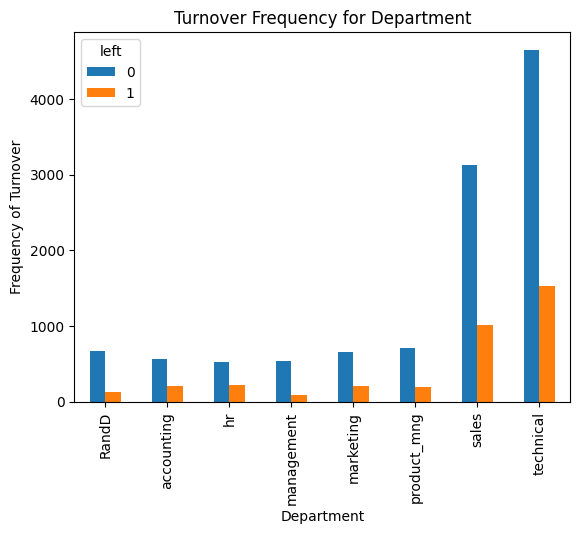

In [16]:
#Bar chart for department employee work for and the frequency of turnover

%matplotlib inline
import matplotlib.pyplot as plt
pd.crosstab(hr.department,hr.left).plot(kind='bar')
plt.title('Turnover Frequency for Department')
plt.xlabel('Department')
plt.ylabel('Frequency of Turnover')
plt.savefig('department_bar_chart')

It is evident that the frequency of employee turnover depends a great deal on the department they work for. Thus, department can be a good predictor of the outcome variable.

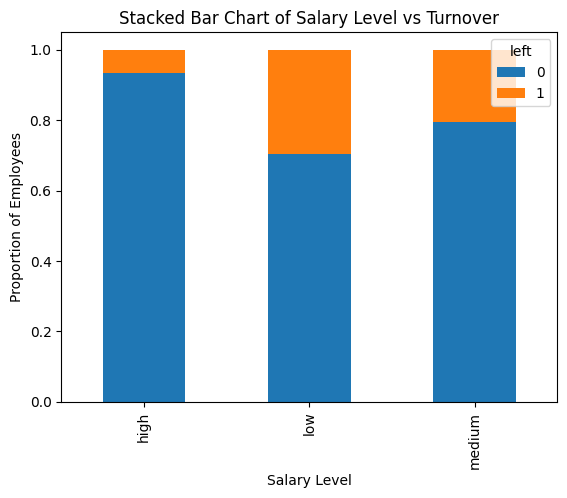

In [17]:
#Bar chart for employee salary level and the frequency of turnover

table=pd.crosstab(hr.salary, hr.left)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Salary Level vs Turnover')
plt.xlabel('Salary Level')
plt.ylabel('Proportion of Employees')
plt.savefig('salary_bar_chart')

The proportion of the employee turnover depends a great deal on their salary level; hence, salary level can be a good predictor in predicting the outcome.

Histograms are often one of the most helpful tools we can use for numeric variables during the exploratory phrase.

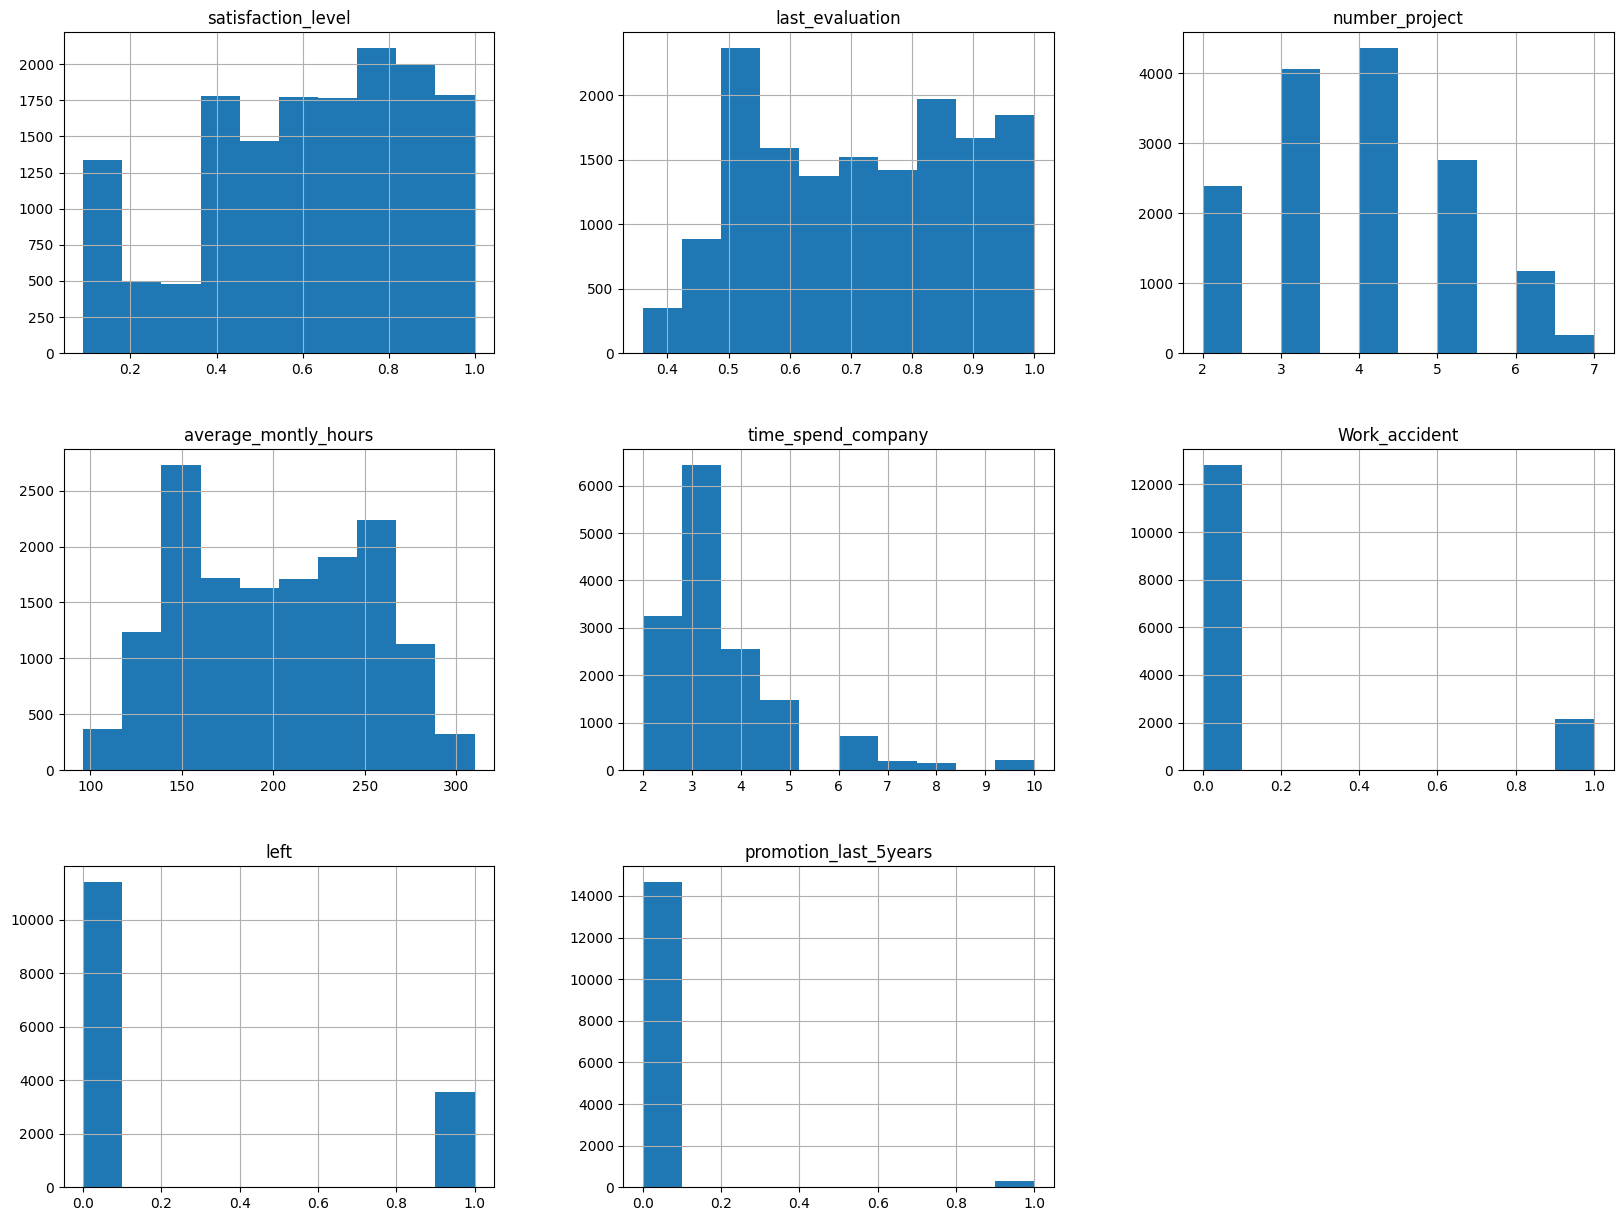

In [18]:
#Histogram of numeric variables

num_bins = 10
hr.hist(bins=num_bins, figsize=(20,15))
plt.savefig("hr_histogram_plots")
plt.show()

# ***Creating Dummy Variables for Categorical Variables***
There are two categorical variables (department, salary) in the dataset and they need to be converted to dummy variables before they can be used for modelling.

In [19]:
cat_vars=['department','salary']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(hr[var], prefix=var)
    hr1=hr.join(cat_list)
    hr=hr1

The actual categorical variable needs to be removed once the dummy variables have been created.

Column names after creating dummy variables for categorical variables:

In [20]:
hr.drop(hr.columns[[8, 9]], axis=1, inplace=True)
hr.columns.values

array(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'left', 'promotion_last_5years', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng',
       'department_sales', 'department_technical', 'salary_high',
       'salary_low', 'salary_medium'], dtype=object)

In [21]:
#The outcome variable is “left”, and all the other variables are predictors.

hr_vars=hr.columns.values.tolist()
y=['left']
X=[i for i in hr_vars if i not in y]

# ***Feature Selection***
The Recursive Feature Elimination (RFE) works by recursively removing variables and building a model on those variables that remain. It uses the model accuracy to identify which variables (and combination of variables) contribute the most to predicting the target attribute.

Let’s use feature selection to help us decide which variables are significant that can predict employee turnover with great accuracy. There are total 18 columns in X, how about select 10?

In [23]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
rfe = RFE(model, n_features_to_select=10)
rfe = rfe.fit(hr[X], hr[y])
print(rfe.support_)
print(rfe.ranking_)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

[ True  True False False  True  True  True  True False  True  True False
 False False False  True  True False]
[1 1 3 9 1 1 1 1 5 1 1 6 8 7 4 1 1 2]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


You can see that RFE chose the 10 variables for us, which are marked True in the support_ array and marked with a choice “1” in the ranking_array. They are:

[‘satisfaction_level’, ‘last_evaluation’, ‘time_spend_company’, ‘Work_accident’, ‘promotion_last_5years’, ‘department_RandD’, ‘department_hr’, ‘department_management’, ‘salary_high’, ‘salary_low’]

In [24]:
cols=['satisfaction_level', 'last_evaluation', 'time_spend_company', 'Work_accident', 'promotion_last_5years',
      'department_RandD', 'department_hr', 'department_management', 'salary_high', 'salary_low']
X=hr[cols]
y=hr['left']

# **Logistic Regression Model**

In [26]:
from sklearn.model_selection import train_test_split # Import train_test_split from sklearn.model_selection
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [27]:
from sklearn.metrics import accuracy_score
print('Logistic regression accuracy: {:.3f}'.format(accuracy_score(y_test, logreg.predict(X_test))))

Logistic regression accuracy: 0.770


# **Random Forest**

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [29]:
print('Random Forest Accuracy: {:.3f}'.format(accuracy_score(y_test, rf.predict(X_test))))

Random Forest Accuracy: 0.978


# **Support Vector Machine**

In [30]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [31]:
print('Support vector machine accuracy: {:.3f}'.format(accuracy_score(y_test, svc.predict(X_test))))

Support vector machine accuracy: 0.907


The winner is … Random forest, right?

# ***Cross Validation***
Cross validation attempts to avoid overfitting while still producing a prediction for each observation dataset. We are using 10-fold Cross-Validation to train our Random Forest model.

In [33]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier # Make sure RandomForestClassifier is imported

# Set shuffle=True to enable shuffling and make random_state effective
kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)

modelCV = RandomForestClassifier()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.982


The average accuracy remains very close to the Random Forest model accuracy; hence, we can conclude that the model generalizes well.

# ***Precision and recall***
We construct confusion matrix to visualize predictions made by a classifier and evaluate the accuracy of a classification.

**Random Forest**

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3462
           1       0.95      0.96      0.95      1038

    accuracy                           0.98      4500
   macro avg       0.97      0.97      0.97      4500
weighted avg       0.98      0.98      0.98      4500



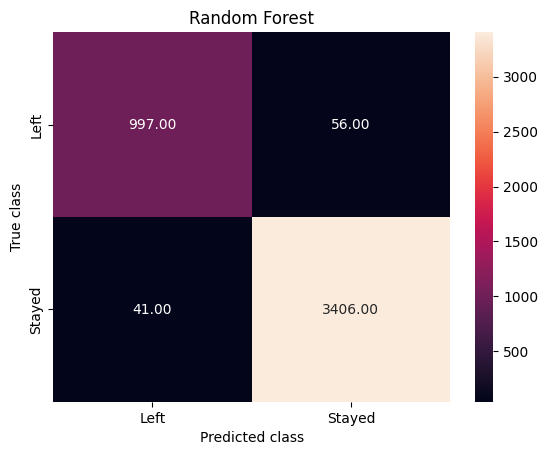

In [36]:
y_pred = rf.predict(X_test)
from sklearn.metrics import confusion_matrix
import seaborn as sns
# The labels argument should be passed as a keyword argument.
forest_cm = metrics.confusion_matrix(y_pred, y_test, labels=[1,0])
sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')
plt.savefig('random_forest')

**Logistic Regression**

In [37]:
print(classification_report(y_test, logreg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      3462
           1       0.50      0.26      0.35      1038

    accuracy                           0.77      4500
   macro avg       0.66      0.59      0.60      4500
weighted avg       0.74      0.77      0.74      4500



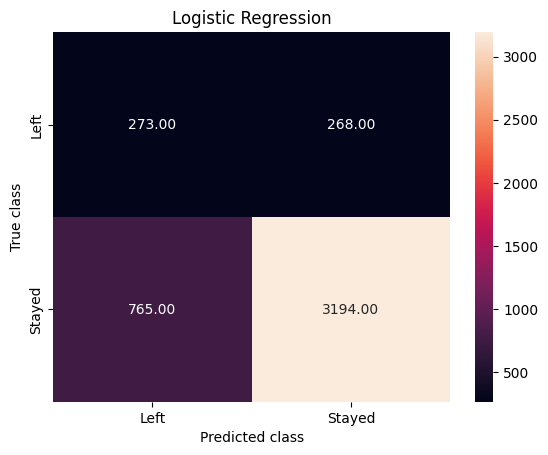

In [39]:
logreg_y_pred = logreg.predict(X_test)
# The labels argument should be passed as a keyword argument
logreg_cm = metrics.confusion_matrix(logreg_y_pred, y_test, labels=[1,0])
sns.heatmap(logreg_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Logistic Regression')
plt.savefig('logistic_regression')

**Support Vector Machine**

In [40]:
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94      3462
           1       0.77      0.85      0.81      1038

    accuracy                           0.91      4500
   macro avg       0.86      0.89      0.87      4500
weighted avg       0.91      0.91      0.91      4500



In [41]:
svc_y_pred = svc.predict(X_test)
svc_cm = metrics.confusion_matrix(svc_y_pred, y_test, [1,0])
sns.heatmap(svc_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Support Vector Machine')
plt.savefig('support_vector_machine')

TypeError: too many positional arguments

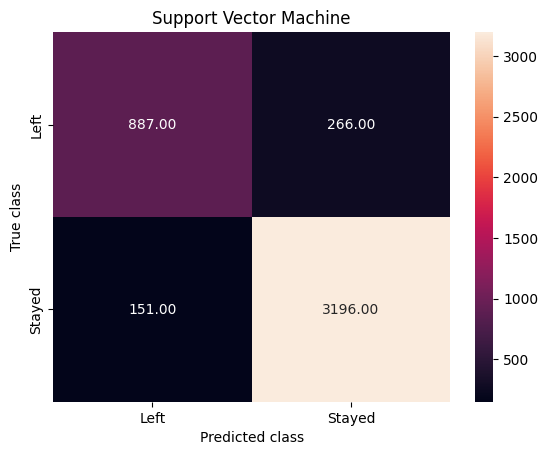

In [42]:
svc_y_pred = svc.predict(X_test)
# The labels argument should be passed as a keyword argument.
svc_cm = metrics.confusion_matrix(svc_y_pred, y_test, labels=[1,0])
sns.heatmap(svc_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Support Vector Machine')
plt.savefig('support_vector_machine')

When an employee left, how often does my classifier predict that correctly? This measurement is called “recall” and a quick look at these diagrams can demonstrate that random forest is clearly best for this criteria. Out of all the turnover cases, random forest correctly retrieved 991 out of 1038. This translates to a turnover “recall” of about 95% (991/1038), far better than logistic regression (26%) or support vector machines (85%).

When a classifier predicts an employee will leave, how often does that employee actually leave? This measurement is called “precision”. Random forest again outperforms the other two at about 95% precision (991 out of 1045) with logistic regression at about 51% (273 out of 540), and support vector machine at about 77% (890 out of 1150)

***The ROC Curve***

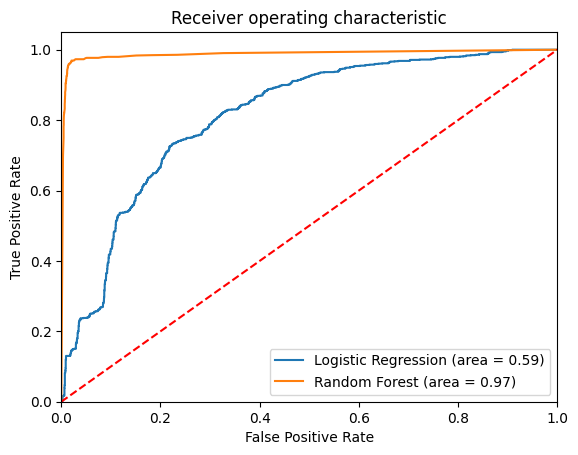

In [43]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()

The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

# **Feature Importance for Random Forest Model**

In [44]:
feature_labels = np.array(['satisfaction_level', 'last_evaluation', 'time_spend_company', 'Work_accident', 'promotion_last_5years',
      'department_RandD', 'department_hr', 'department_management', 'salary_high', 'salary_low'])
importance = rf.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

promotion_last_5years-0.25%
department_management-0.26%
department_hr-0.28%
department_RandD-0.32%
salary_high-0.66%
salary_low-1.26%
Work_accident-1.53%
last_evaluation-18.64%
time_spend_company-26.12%
satisfaction_level-50.68%


According to our Random Forest model, the above shows the most important features which influence whether an employee will leave the company, in ascending order.

# **Summary**

This brings us to the end of the post. I am not going to print out a list of employees who the model predicts that they are likely to quit. This is not the objective of this analysis. Remember that we can’t have an algorithm for everyone. Employee turnover analysis can help guide decisions, but not make them. Use analytics carefully to avoid legal issues and mistrust from employees, and use them in conjunction with employee feedback, to make the best decisions possible.